In [1]:
# https://www.rdkit.org/
import rdkit
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider

In [4]:
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [5]:
name1 = "CCC#C"
m1 = Chem.MolFromSmiles(name1)
name2 = "CC#CC"
m2 = Chem.MolFromSmiles(name2)

# Inspect Bit with Image

In [6]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint

mol1 = Chem.MolFromSmiles('COCN1C2C(N(C1=O)COC)N(C(=O)N2COC)COC')
mol2 = Chem.MolFromSmiles('C1=CC(=CC(=C1)C(=O)O)C(=O)O')
mol3 = Chem.MolFromSmiles('CO')
mol4 = Chem.MolFromSmiles('N=C=O')
bit_info1 = {}
bit_info2 = {}
bit_info3 = {}
fp1 = GetHashedMorganFingerprint(mol1, 3, bitInfo=bit_info1, useFeatures=True)
fp2 = GetHashedMorganFingerprint(mol2, 3, bitInfo=bit_info2, useFeatures=True)
fp3 = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info3, useFeatures=True)
#fp3 = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info3, useFeatures=True)

In [7]:
print(get_index_of_array_that_contain_1_in_any_position(list(fp1)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp2)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp3)))

[0, 2, 207, 212, 366, 542, 648, 806, 1114, 1219, 1368, 1668, 1706, 1737, 1796, 1850, 2040]
[1, 2, 4, 7, 32, 149, 321, 535, 598, 809, 1032, 1048, 1502, 1552, 1635, 1950, 1976, 2017]
[0, 3, 1230]


# Inspect All Bit in Molecule

In [8]:
# Inspect Bit
mol = mol1
bit_info_mol_1 = {}
fp_mol = GetHashedMorganFingerprint(mol1, 2, 1024, bitInfo=bit_info_mol_1, useFeatures=True, useChirality=True)
all_fragments = [(mol1, x, bit_info_mol_1) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img1=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

In [9]:
# Inspect Bit
#mol = mol2
mol2 = Chem.MolFromSmiles('CN')
#mol2 = Chem.MolFromSmiles('CO')
bit_info_mol_2 = {}
fp_mol = GetHashedMorganFingerprint(mol2, 3, 4096, bitInfo=bit_info_mol_2, useFeatures=True, useChirality=True)
all_fragments = [(mol2, x, bit_info_mol_2) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img2=Draw.DrawMorganBits(all_fragments[:], molsPerRow=4, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

     0  1
0    0  1
1   19  1
2  901  1


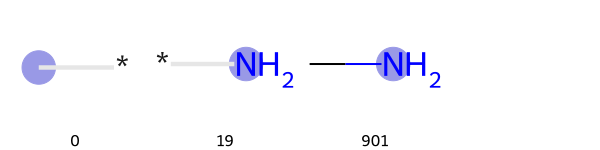

In [10]:
count_bit_info_mol=[]
for i in bit_info_mol_2:
    count_bit_info_mol.append([i, len(bit_info_mol_2[i])])
print(pd.DataFrame(count_bit_info_mol))
#print(get_All_SMART_1_mol(mol2, 3, 2048))
img2

In [21]:
# Inspect Bit
#mol = mol2
#mol2 = Chem.MolFromSmiles('C(C(C(CC(=O)O)C(=O)O)C(=O)O)C(=O)O')
mol2 = Chem.MolFromSmiles('C(=O)(N)NC(=O)NC(=O)N')
bit_info_mol_2 = {}
fp_mol = GetHashedMorganFingerprint(mol2, 3, 4096, bitInfo=bit_info_mol_2, useFeatures=True, useChirality=True)
all_fragments = [(mol2, x, bit_info_mol_2) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img2=Draw.DrawMorganBits(all_fragments[:], molsPerRow=4, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

In [22]:
interact(renderFpBit, bitIdx=list(bit_info_mol_2.keys()),mol=fixed(mol2),
         bitInfo=fixed(bit_info_mol_2),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(0, 1, 2, 1414, 1442, 1567, 2431, 2654, 2827, 287…

       0  1
0      0  4
1      1  4
2      2  4
3     32  4
4    429  2
5    975  2
6   1741  2
7   1764  2
8   2370  2
9   2397  4
10  3000  2
11  3042  2
12  3096  4
13  3932  2
14  3998  4


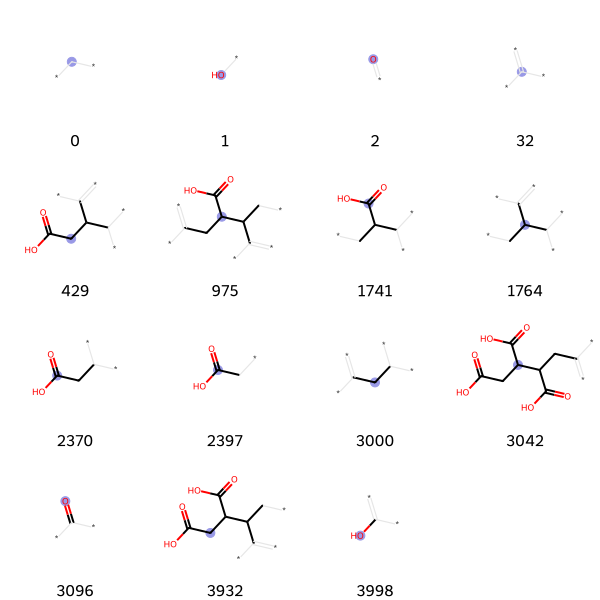

In [14]:
count_bit_info_mol=[]
for i in bit_info_mol_2:
    count_bit_info_mol.append([i, len(bit_info_mol_2[i])])
print(pd.DataFrame(count_bit_info_mol))
#print(get_All_SMART_1_mol(mol2, 3, 2048))
img2

In [99]:
# Inspect Bit
mol = mol3
bit_info_mol_3 = {}
fp_mol = GetHashedMorganFingerprint(mol3, 2, 2048, bitInfo=bit_info_mol_3, useFeatures=True, useChirality=True)
all_fragments = [(mol3, x, bit_info_mol_3) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img3=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

In [51]:
# Inspect Bit
mol = mol4
bit_info_mol_4 = {}
fp_mol = GetHashedMorganFingerprint(mol4, 2, 1024, bitInfo=bit_info_mol_4, useFeatures=True)
all_fragments = [(mol4, x, bit_info_mol_4) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img4=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])

       0   1
0      0  16
1      2   6
2     90   2
3    195   4
4    344   4
5    366   4
6    644   6
7    648   2
8    682   4
9    713   2
10   806   4
11   826   4
12  1016   2


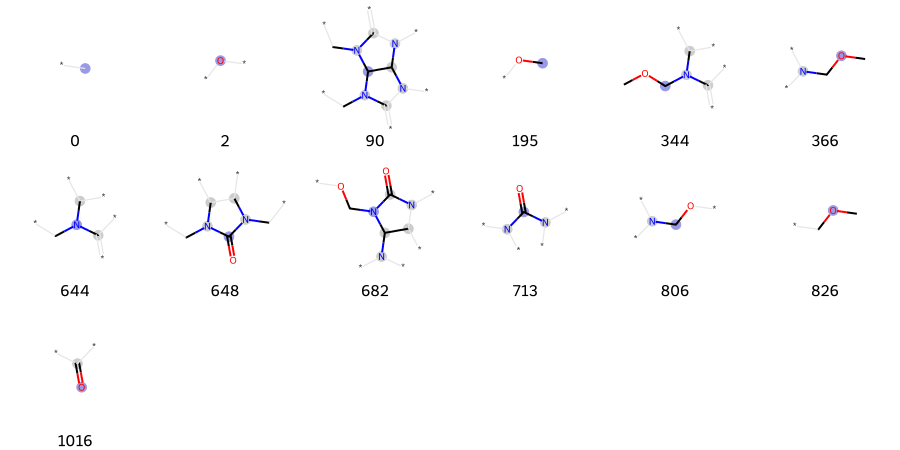

In [52]:
count_bit_info_mol=[]
for i in bit_info_mol_1:
    count_bit_info_mol.append([i, len(bit_info_mol_1[i])])
print(pd.DataFrame(count_bit_info_mol))
#print(get_All_SMART_1_mol(mol1, 3, 2048))
img1

       0  1
0      1  2
1      2  2
2      4  6
3     32  2
4    321  2
5    535  2
6    598  1
7    809  2
8   1032  1
9   1048  2
10  1502  2
11  1635  2
12  1950  2
13  2017  4


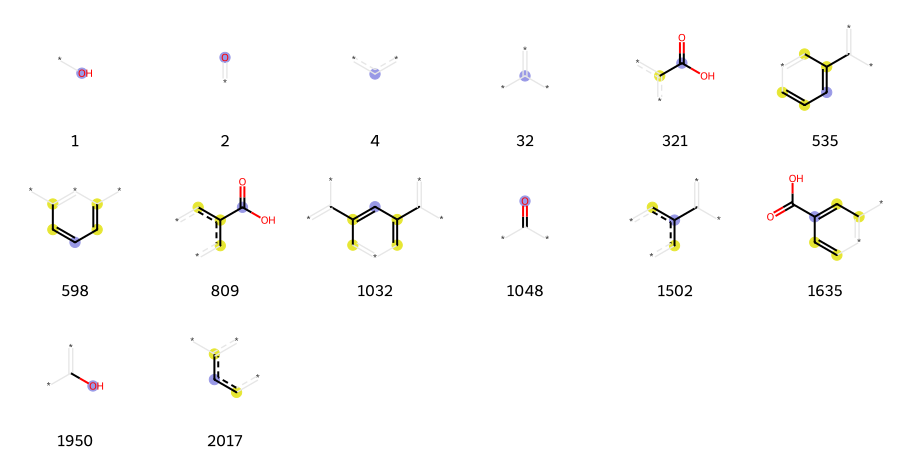

In [53]:
count_bit_info_mol=[]
for i in bit_info_mol_2:
    count_bit_info_mol.append([i, len(bit_info_mol_2[i])])
print(pd.DataFrame(count_bit_info_mol))
#print(get_All_SMART_1_mol(mol2, 3, 2048))
img2

      0  1
0     0  1
1     3  1
2  1230  1


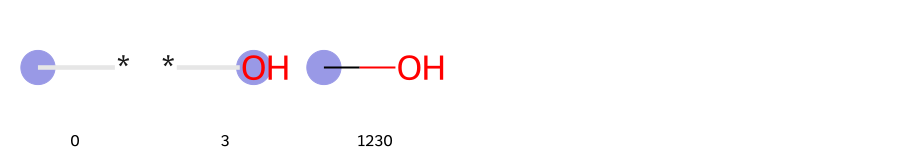

In [54]:
count_bit_info_mol=[]
for i in bit_info_mol_3:
    count_bit_info_mol.append([i, len(bit_info_mol_3[i])])
print(pd.DataFrame(count_bit_info_mol))
#print(get_All_SMART_1_mol(mol3, 3, 2048))
img3

      0  1
0     0  1
1     2  1
2     3  1
3    10  1
4   824  1
5  1016  1


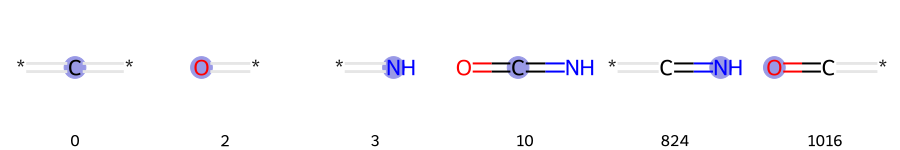

In [223]:
count_bit_info_mol=[]
for i in bit_info_mol_4:
    count_bit_info_mol.append([i, len(bit_info_mol_4[i])])
print(pd.DataFrame(count_bit_info_mol))
#print(get_All_SMART_1_mol(mol4, 3, 2048))
img4

# Inspect All SMART(Bit) in Molecule

In [123]:
# RDKit
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint

from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
#
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed,IntSlider

def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result
def getSMART(mol, radius, atomidx):
    env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atomidx)
    atomsToUse = set((atomidx, ))
    for b in env:
        atomsToUse.add(mol.GetBondWithIdx(b).GetBeginAtomIdx())
        atomsToUse.add(mol.GetBondWithIdx(b).GetEndAtomIdx())
    enlargedEnv = set()
    for atom in atomsToUse:
        a = mol.GetAtomWithIdx(atom)
        for b in a.GetBonds():
          bidx = b.GetIdx()
          if bidx not in env:
            enlargedEnv.add(bidx)
    enlargedEnv = list(enlargedEnv)
    enlargedEnv += env
    # find all relevant neighbors
    anyAtoms = []
    for a in atomsToUse:
        neighbors = mol.GetAtomWithIdx(a).GetNeighbors()
        for n in neighbors:
            anyIdx = n.GetIdx()
            if anyIdx not in atomsToUse:
                anyAtoms.append(anyIdx)
    # replace atomic number to zero (there is no number for any atom)
    for aA in anyAtoms:
        mol.GetAtomWithIdx(aA).SetAtomicNum(0)
    submol = Chem.PathToSubmol(mol, enlargedEnv)
    # change [0] to *
    MorganBitSmarts = Chem.MolToSmarts(submol).replace('[#0]', '*')
    #print(MorganBitSmarts)
    return MorganBitSmarts 
def get_All_SMART_1_mol(mol, radius,nBits):
    bit_info = {}
    fp = GetHashedMorganFingerprint(mol, 3, nBits=nBits, bitInfo=bit_info, useFeatures=True)

    #print(get_index_of_array_that_contain_1_in_any_position(list(fp)))
    #print(bit_info.keys())
    string_SMARTS = []
    for i,v in enumerate(bit_info.keys()):
        #print(i)
        #print("v=",v)
        atomidx, radius = bit_info[v][0]
        string_SMART = getSMART(mol=mol, radius=radius, atomidx=atomidx)
        #print(v, string_SMART)
        string_SMARTS.append((v,string_SMART))
    return string_SMARTS

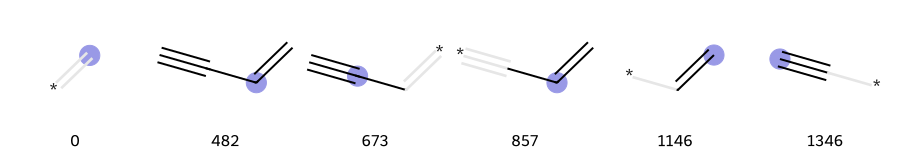

In [11]:
# Inspect Bit
mol = mol3
bit_info_mol_3 = {}
fp_mol = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info_mol_3, useFeatures=True)
all_fragments = [(mol3, x, bit_info_mol_3) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img3=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])
img3

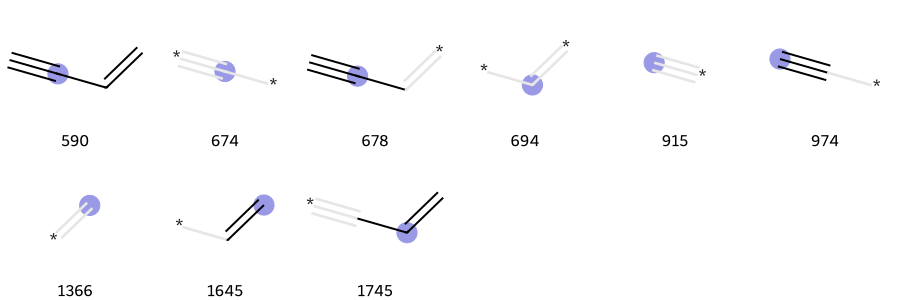

In [12]:
# Inspect Bit
mol = mol3
bit_info_mol_3 = {}
fp_mol = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info_mol_3, useFeatures=False)
all_fragments = [(mol3, x, bit_info_mol_3) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img3=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])
img3

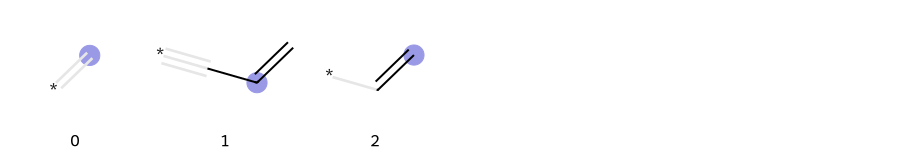

In [37]:
# Inspect Bit
mol = mol3
bit_info_mol_3 = {}
fp_mol = GetHashedMorganFingerprint(mol3, 3,nBits=8, bitInfo=bit_info_mol_3, useFeatures=True)
all_fragments = [(mol3, x, bit_info_mol_3) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))]
img3=Draw.DrawMorganBits(all_fragments[:], molsPerRow=6, legends=[str(x) for x in get_index_of_array_that_contain_1_in_any_position(list(fp_mol))][:])
img3

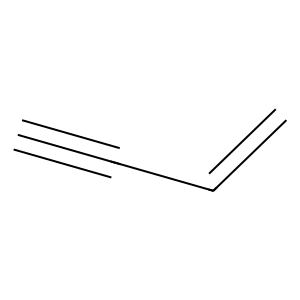

In [20]:
mol3 = Chem.MolFromSmiles('C=CC#C')
img3 = Draw.MolToImage(mol3)
img3